In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape #number of rows and columns

(768, 9)

In [5]:
#checking for missing values
df.isna().sum() #no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.Outcome.value_counts() #total number of patients with and without diabetes 
# 0 denotes no diabetes
# 1 denotes presence of diabetes

0    500
1    268
Name: Outcome, dtype: int64

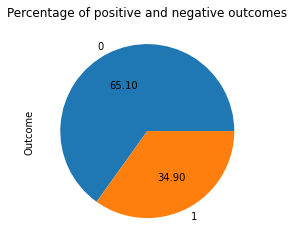

In [7]:
df.Outcome.value_counts(normalize = True).plot(kind = 'pie', autopct = '%0.2f')
plt.title('Percentage of positive and negative outcomes')
plt.show()
# Pie chart showing the percentage number of patients with and without diabetes 

In [8]:
df.loc[df['Age'] == 81]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.46,81,0


In [9]:
#From 21 to 50 years of age;

In [10]:
#Patients who are 50 years of age and below
low_ages = df.loc[df['Age'] <= 50]
low_ages.shape


(687, 9)

In [11]:
#Total number of low_ages patients witn diabetes
low_ages.Outcome.value_counts()

0    457
1    230
Name: Outcome, dtype: int64

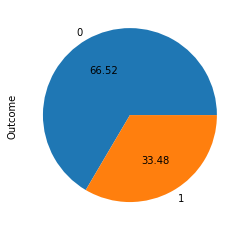

In [12]:
#Percentage number of low_ages patients witn diabetes
low_ages.Outcome.value_counts(normalize = True).plot(kind = 'pie', autopct = '%0.2f')
plt.show()

In [13]:
#From 51 and above

In [14]:
#Patients who are more than 50 years of age
high_ages = df.loc[df['Age'] > 50]
high_ages.shape

(81, 9)

In [15]:
#Total number of high_ages patients witn diabetes
high_ages.Outcome.value_counts()

0    43
1    38
Name: Outcome, dtype: int64

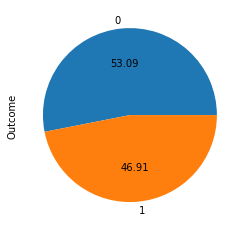

In [16]:
#Percentage number of low_ages patients witn diabetes
high_ages.Outcome.value_counts(normalize = True).plot(kind = 'pie', autopct = '%0.2f')
plt.show()

In [17]:
df.loc[df['Pregnancies'] == 2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
38,2,90,68,42,0,38.2,0.503,27,1
47,2,71,70,27,0,28.0,0.586,22,0
60,2,84,0,0,0,0.0,0.304,21,0
63,2,141,58,34,128,25.4,0.699,24,0
...,...,...,...,...,...,...,...,...,...
733,2,106,56,27,165,29.0,0.426,22,0
734,2,105,75,0,0,23.3,0.560,53,0
738,2,99,60,17,160,36.6,0.453,21,0
760,2,88,58,26,16,28.4,0.766,22,0


In [18]:
X = df.drop(['Outcome'], axis = 1).values #independent features
y = df['Outcome'].values #dependent feature


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
#Creating tensors
#independent feature needs to be converted as a float tensor
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
#Creating model from scratch
class ANN_Model(nn.Module):
    def __init__(self, input_features = 8, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x
        
        
            

In [22]:
# Instantiate the ANN model
torch.manual_seed(20)
model = ANN_Model()

In [23]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [24]:
#backward propagation; define loss function, define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [25]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i + 1
    y_pred = model.forward(x_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    
    if i % 10 == 1:
        print('Epoch number : {} and the loss : {}'.format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        

Epoch number : 1 and the loss : 3.45721173286438
Epoch number : 11 and the loss : 0.8019213080406189
Epoch number : 21 and the loss : 0.6090323328971863
Epoch number : 31 and the loss : 0.5917770862579346
Epoch number : 41 and the loss : 0.567970871925354
Epoch number : 51 and the loss : 0.552903950214386
Epoch number : 61 and the loss : 0.5410096645355225
Epoch number : 71 and the loss : 0.5310390591621399
Epoch number : 81 and the loss : 0.522036075592041
Epoch number : 91 and the loss : 0.5135970115661621
Epoch number : 101 and the loss : 0.5061255097389221
Epoch number : 111 and the loss : 0.49834105372428894
Epoch number : 121 and the loss : 0.4960549771785736
Epoch number : 131 and the loss : 0.48286378383636475
Epoch number : 141 and the loss : 0.4756038784980774
Epoch number : 151 and the loss : 0.48334550857543945
Epoch number : 161 and the loss : 0.4882747530937195
Epoch number : 171 and the loss : 0.4705841839313507
Epoch number : 181 and the loss : 0.47636622190475464
Epoch

Text(0.5, 0, 'Epoch')

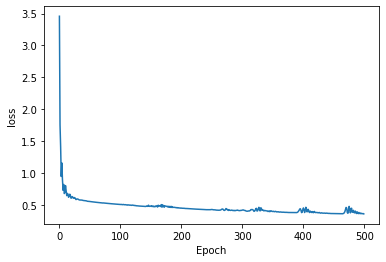

In [26]:
#plotting the loss function
plt.plot(range(epochs), final_losses)
plt.ylabel('loss')
plt.xlabel('Epoch')

In [27]:
#prediction in x_test data
predictions = []
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[90, 17],
       [15, 32]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

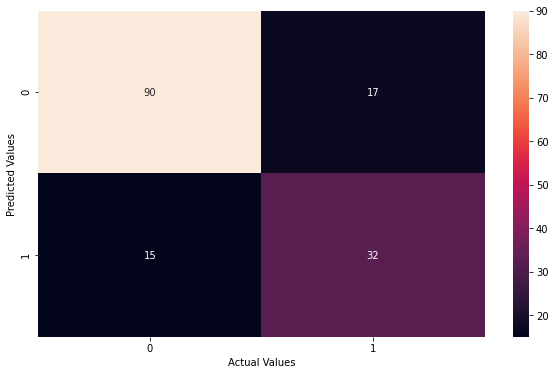

In [29]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


In [30]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print(score)

0.7922077922077922


In [31]:
##Save the model
#torch.save(model, 'diabetes.pt')

In [32]:
#load model
#model = torch.load('diabetes.pt')

In [33]:
#model.eval()

In [34]:
#Prediction of new datapoint

list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [35]:
#new data
list1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]


In [36]:
new_data = torch.tensor(list1)

In [37]:
#predict  new data using pytorch
with torch.no_grad():
    print(model(new_data).argmax().item())

1


In [38]:
with torch.no_grad():
    print(model(new_data))

tensor([0.9786, 1.4289])
